In [ ]:
!pip install pandas numpy==2.1 seaborn matplotlib scikit-learn umap-learn

## ФИО: Нафикова Лиана Ирековна

Вам предоставлены данные с описанием ситуации в странах, данные содержат следующую информацию:

`name` - название страны

`child_mort` - cмертность детей в возрасте до 5 лет на 1000 живорождений

`exports` - экспорт товаров и услуг на душу населения. Приведено в % от ВВП на душу населения

`health` - общие расходы на здравоохранение на душу населения. Указаны как % от ВВП на душу населения

`Imports` - импорт товаров и услуг на душу населения. Указано в % от ВВП на душу населения.

`Income` - чистый доход на человека

`Inflation` - измерение годового темпа роста общего ВВП

`life_expec` - ожидаемая продолжительность жизни

`total_fer` - ожидаемая рождаемость 

`gdpp` - ВВП на душу населения


### Задание

Представьте, что вы анализируйте данные для международной благотворительной организации, которая оказывает поддержку наиболее нуждающимся странам, на основе этих данных выберите страны, которым помощь нужна в первую очередь.

1. Анализ и предобработка.

        1.1. Проанализировать данные (EDA).

        1.2. Предобработать данные.

        1.3 Скалировать/нормализовать данные.

2. Решите задачу с помощью следующих методов:

        2.1. K-means/mini batch k means

        2.2. Иерархическая кластеризация

        2.3.DBSCAN

3. Для каждого метода определить оптимальное количество кластеров (построить график)

4. Сделайте выводы, определите, каким странам нужно помогать в первую очередь. Опишите выделите кластеры. Опишите эталонную страну в каждом кластере. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("../data/data_lab_4.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Анализ и предобработка

In [3]:
display(data.describe())

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [4]:
def info (df):
    """
        Выводит информацию о столбцах с пропущенными значениями в DataFrame Pandas.
    """
    counter = 0
    for col in df:
        missing_perc = (df[col].isnull().sum() / len(df[col])) * 100
        if df[col].isnull().sum() != 0:
            counter += 1
            print(f'Column "{col}" has {missing_perc:.2f}% missing')
    print(f'"{counter}" columns have missing values')

info(data)

"0" columns have missing values


In [5]:
for col in data.columns:
    print(f"Колонка '{col}': {data[col].nunique()} уникальных значений")

Колонка 'country': 167 уникальных значений
Колонка 'child_mort': 139 уникальных значений
Колонка 'exports': 147 уникальных значений
Колонка 'health': 147 уникальных значений
Колонка 'imports': 151 уникальных значений
Колонка 'income': 156 уникальных значений
Колонка 'inflation': 156 уникальных значений
Колонка 'life_expec': 127 уникальных значений
Колонка 'total_fer': 138 уникальных значений
Колонка 'gdpp': 157 уникальных значений


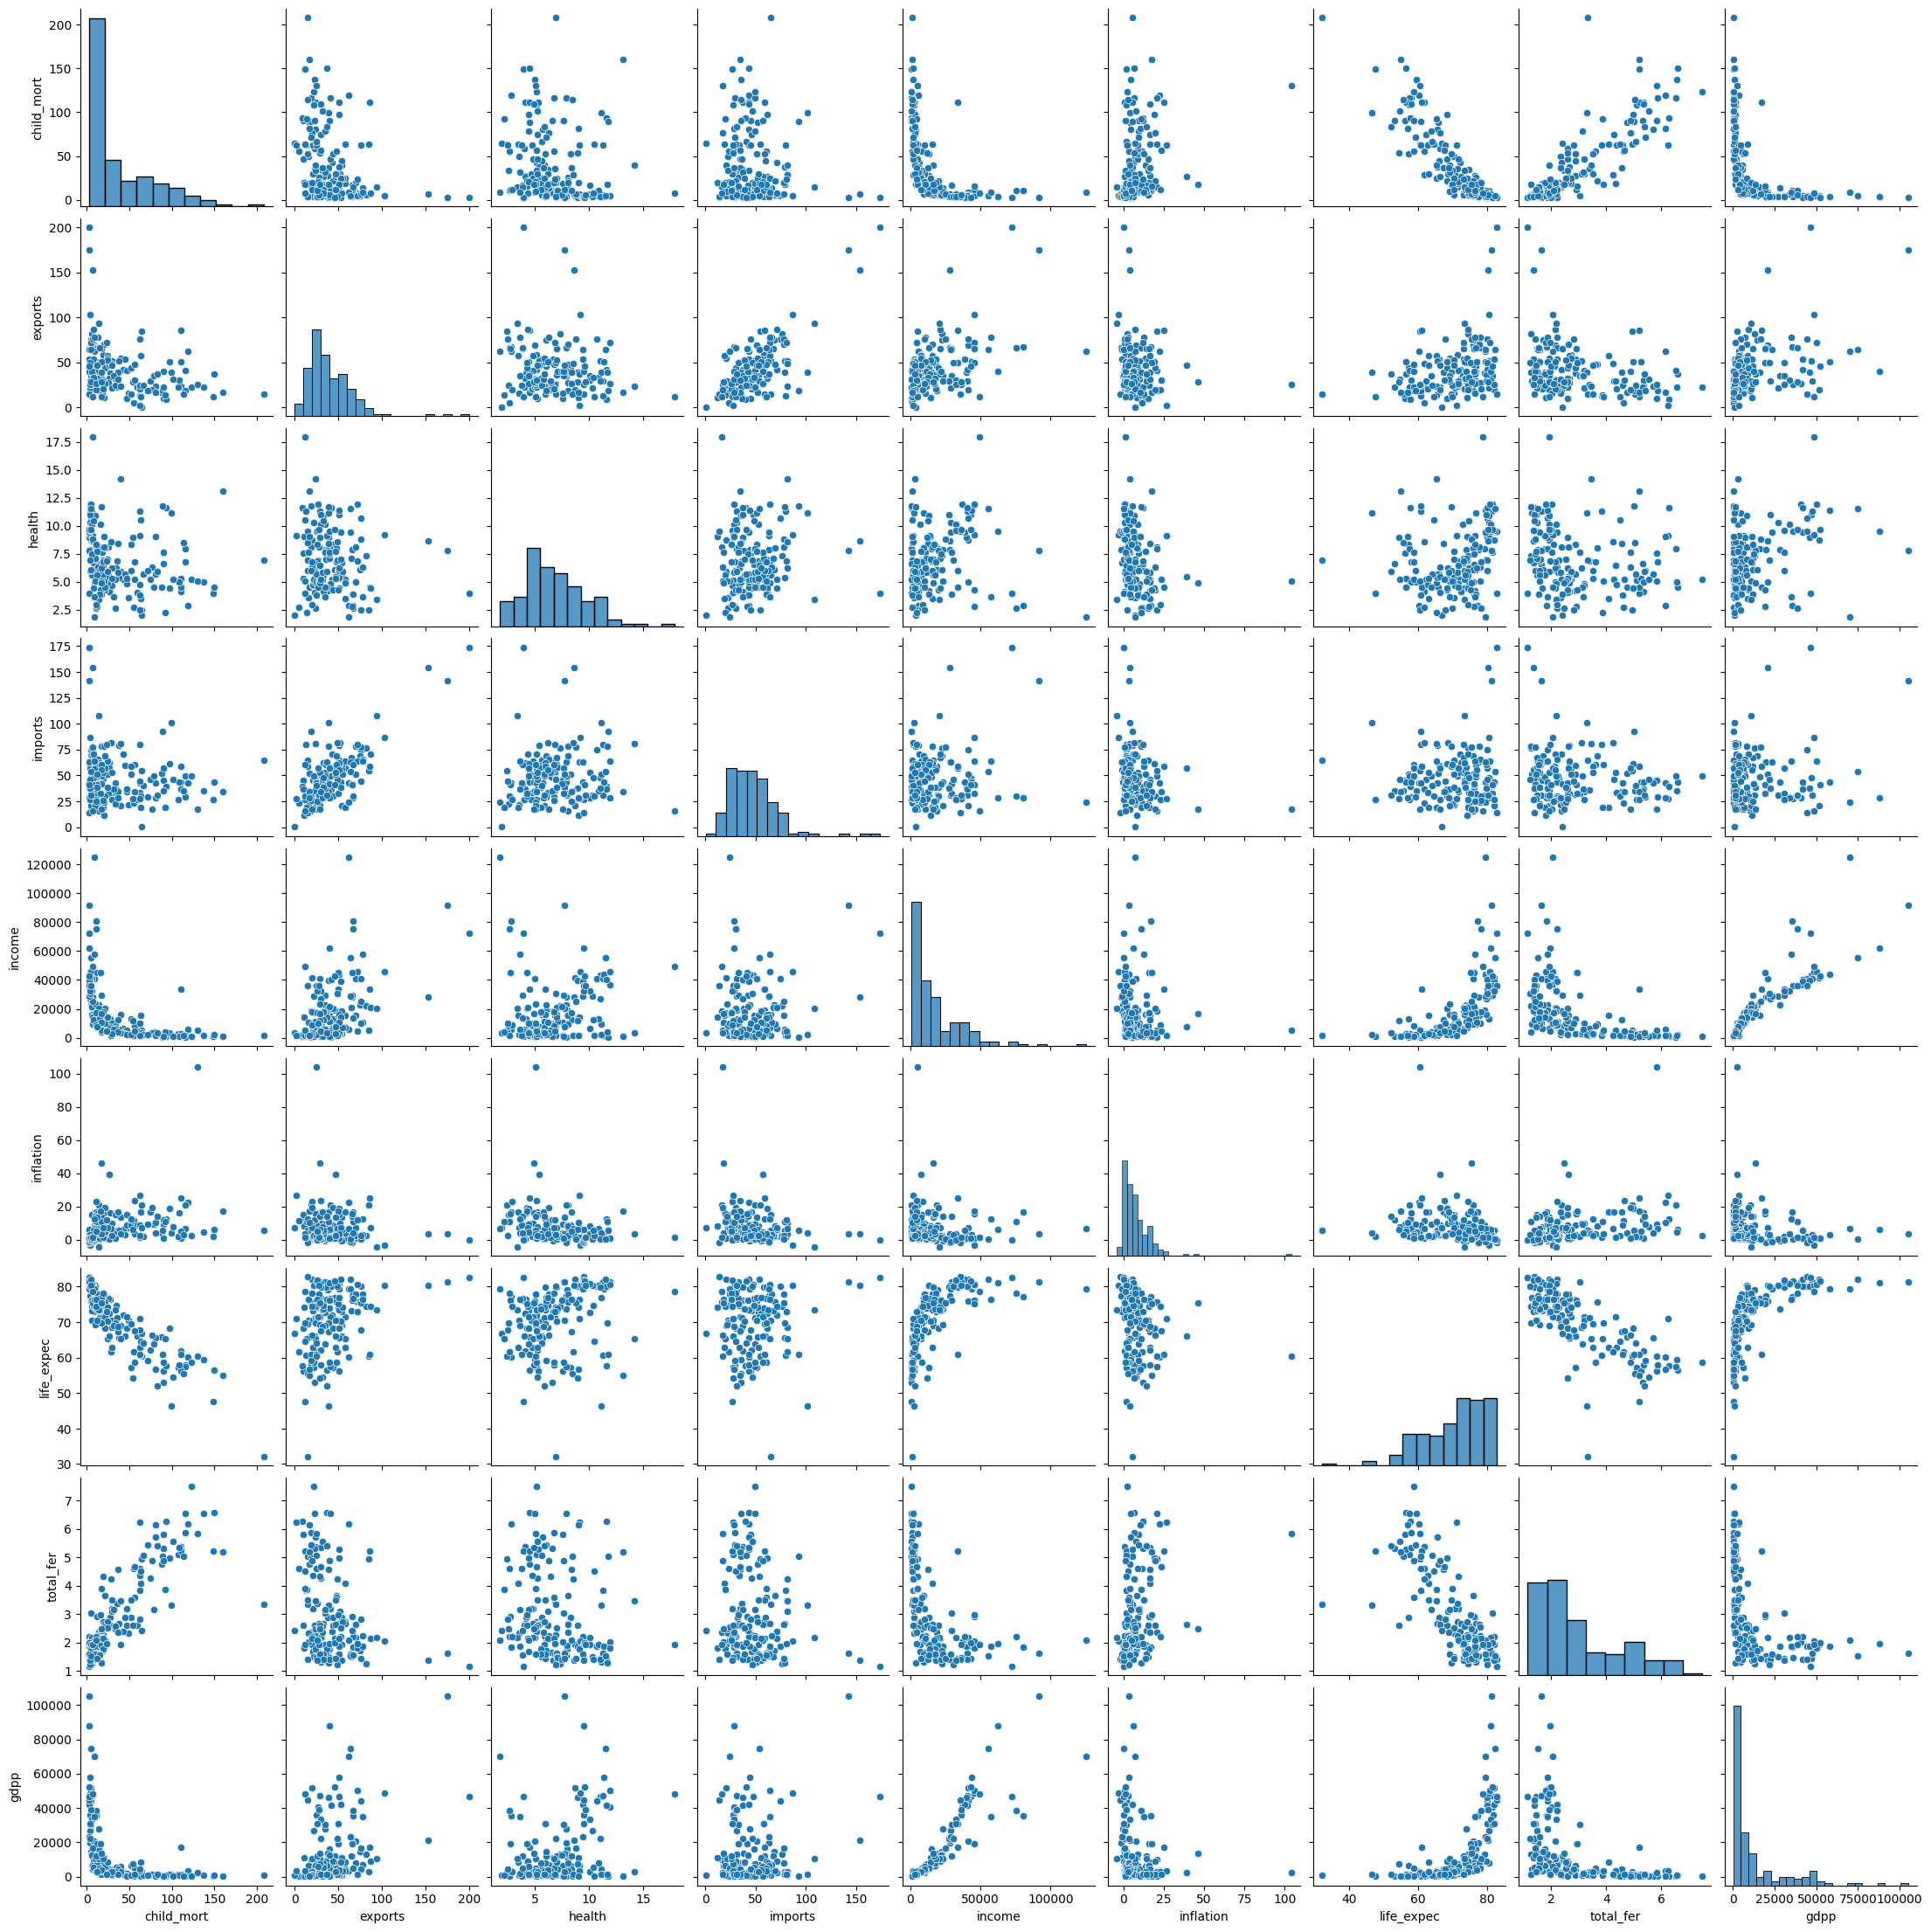

In [6]:
sns.pairplot(data) 
plt.show()

child_mort и gdpp: Чем выше ВВП на душу населения, тем ниже детская смертность. 

child_mort и income: Более высокий доход на человека, скорее всего, связан с более низкой детской смертностью.

life_expec (ожидаемая продолжительность жизни) и gdpp: Чем выше ВВП на душу населения, тем больше ожидаемая продолжительность жизни.

life_expec и child_mort: Чем выше детская смертность, тем ниже ожидаемая продолжительность жизни.

total_fer (суммарный коэффициент рождаемости) и gdpp: Отрицательная корреляция. Более высокий уровень рождаемости часто наблюдается в странах с более низким ВВП.

total_fer и life_expec: Отрицательная корреляция. Большая рождаемость соотносится с меньшей ожидаемой продолжительностью жизни.

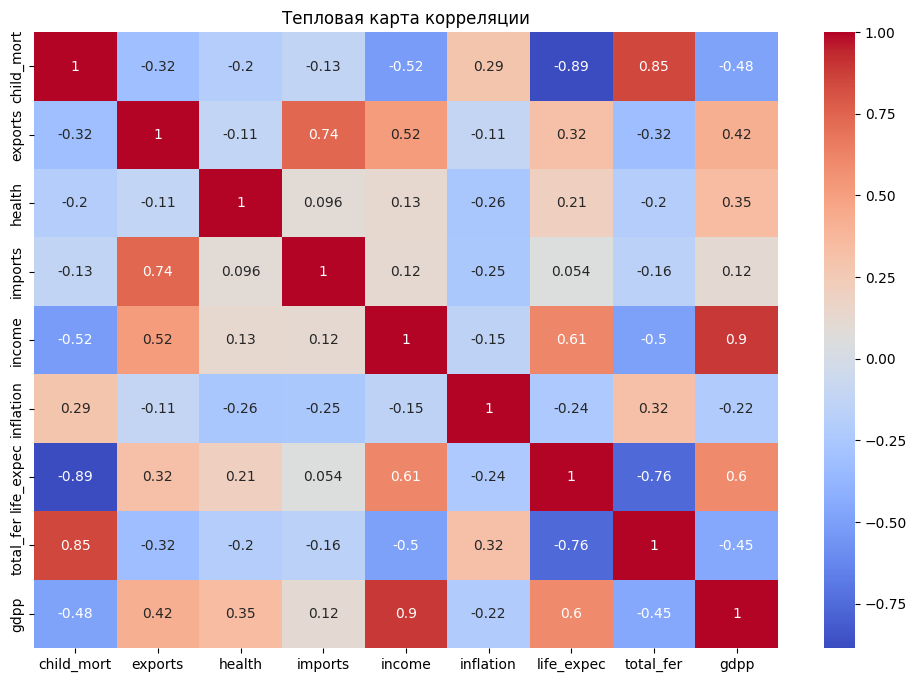

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=['country']).corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

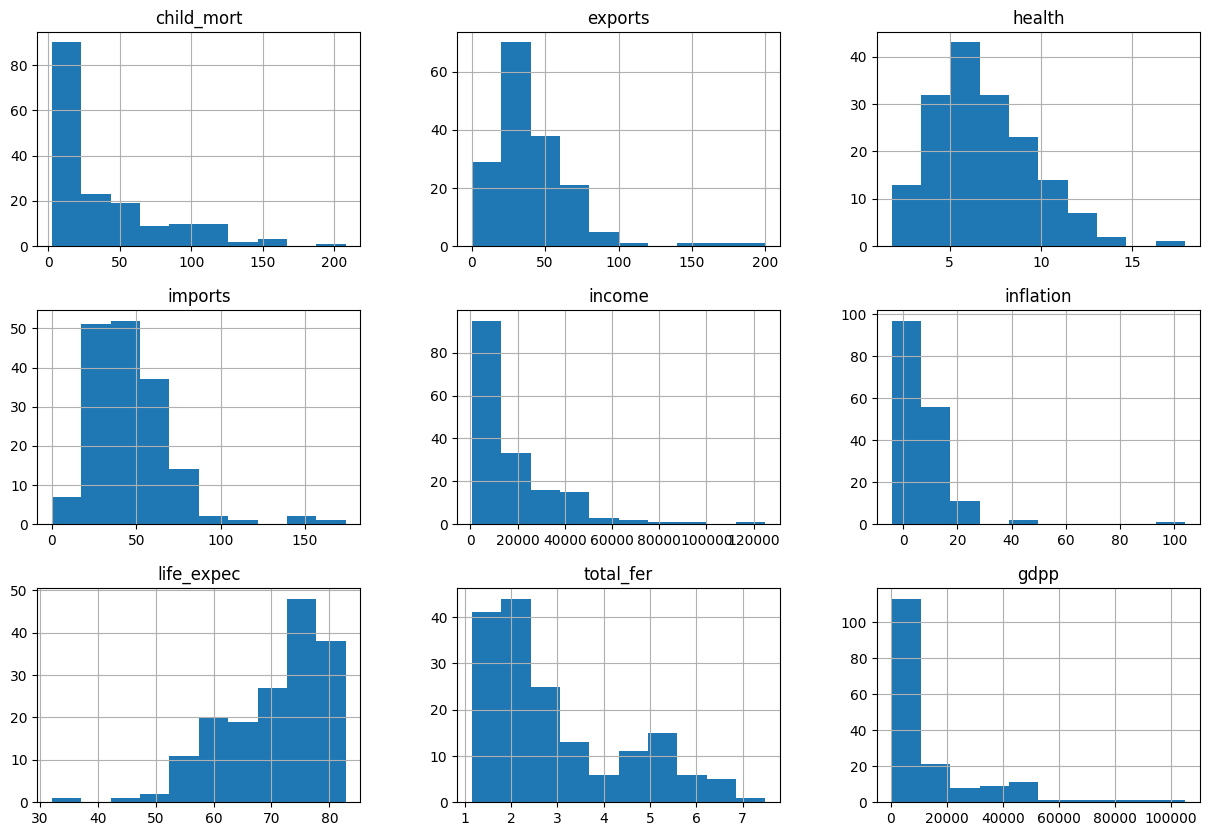

In [8]:
data.hist(figsize=(15,10))
plt.show()

In [9]:
country_names = data['country']
data = data.drop('country', axis=1)

In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_features, columns=data.columns) 

In [11]:
scaled_data.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

/home/liana/ML/ML-ITMO/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/tmp/ipykernel_15316/1662998373.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, palette='viridis', s=50)


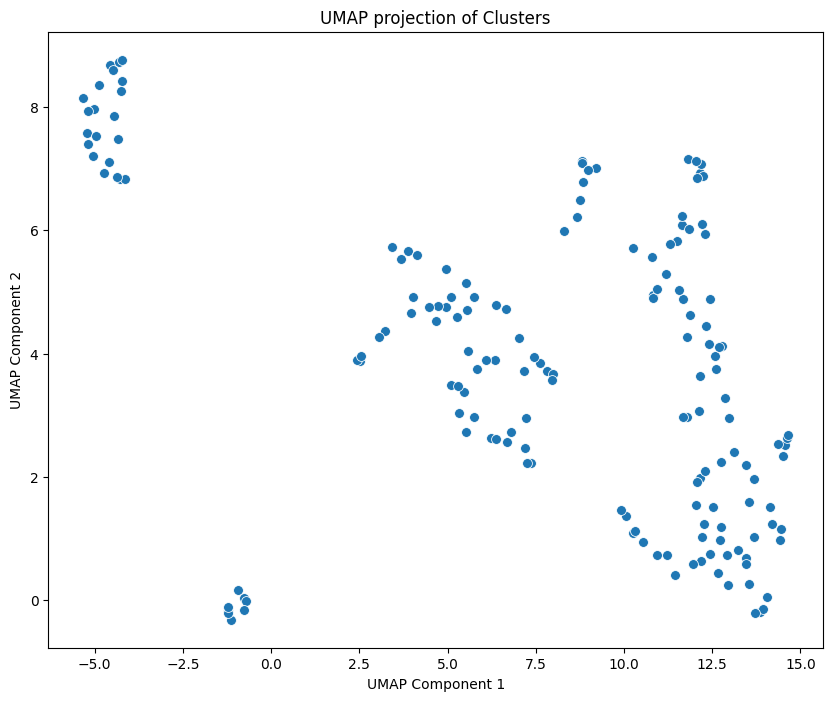

In [98]:
import umap 
reducer = umap.UMAP(
        n_neighbors=4,
        min_dist=0.2,
        n_components=2,
        metric='cosine'
    )
embedding = reducer.fit_transform(scaled_data)

umap_df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df, palette='viridis', s=50) 
plt.title('UMAP projection of Clusters')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

на картинке можно выделить 3-4 кластера

### K-means Clustering

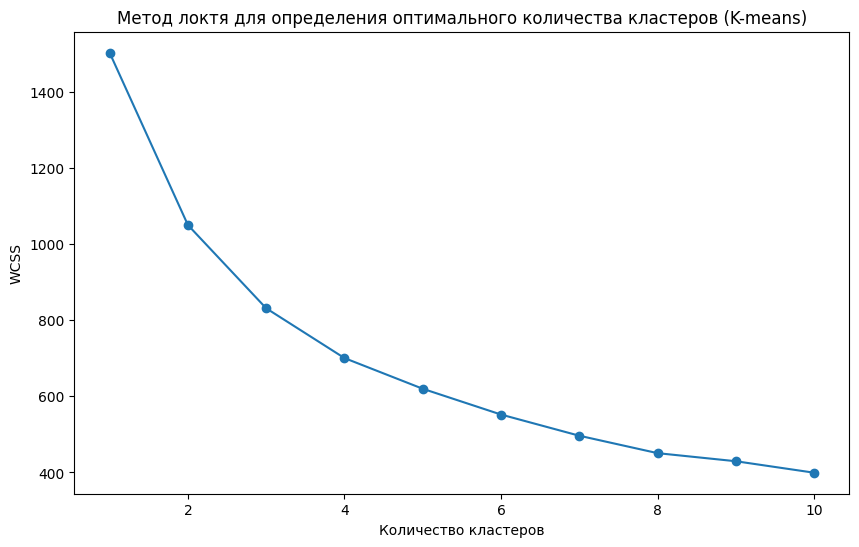

In [12]:
# WCSS - это сумма квадратов расстояний от каждой точки данных до центроида (центра) кластера, к которому она принадлежит. Чем меньше WCSS, тем более компактны кластеры.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров (K-means)')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

Оптимально 3-4 кластера

In [13]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0) 
kmeans.fit(scaled_data)
labels_kmeans = kmeans.labels_

In [14]:
data['KMeans_Cluster'] = labels_kmeans

### Иерархическая кластеризация

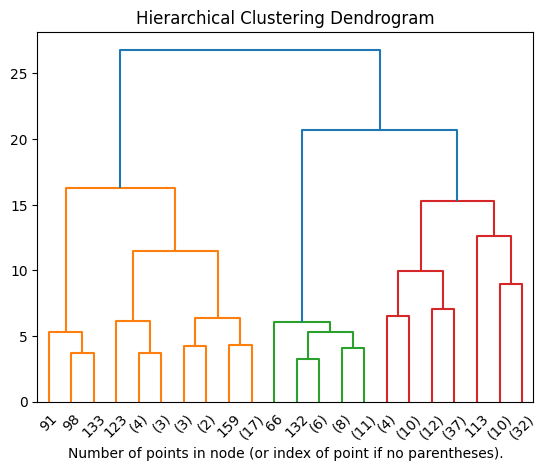

In [15]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for (i, merge) in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count
  linkage_matrix = np.column_stack([model.children_,
      model.distances_, counts]).astype(float)
  
  dendrogram(linkage_matrix, **kwargs)

X = scaled_data

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

fitted = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(fitted, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parentheses).")
plt.show()

In [16]:
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(scaled_data)

data['Hierarchical_Cluster'] = labels_hierarchical

### DBSCAN

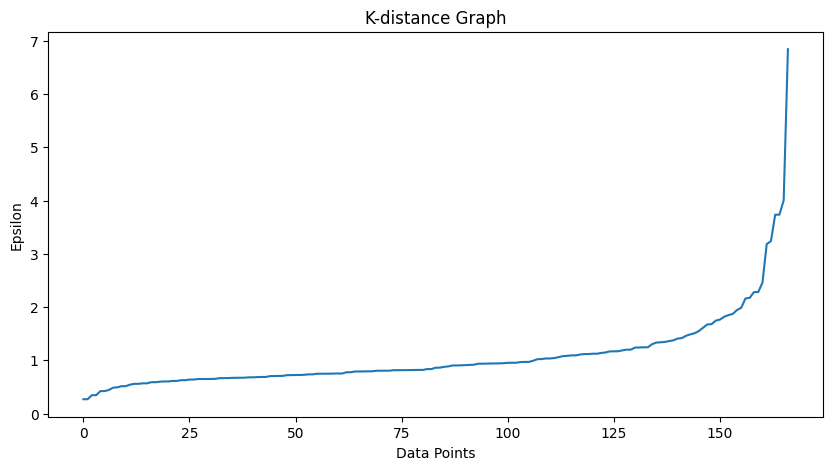

In [17]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(scaled_data)
distances, indices = neighbors.kneighbors(scaled_data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

In [34]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5) 
labels_dbscan = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster'] = labels_dbscan

In [19]:
data['country'] = country_names

In [20]:
data.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster  \
0       5.82    553               1                     2              -1   
1       1.65   4090               2                     0               0   
2       2.89   4460               2                     0              -1   
3       6.16   3530               1                     0              -1   
4       2.13  12200               2                     0               0   

               country  
0          Afghanistan  
1              Albania  
2              Algeria  
3               Angola  
4  Antigua and Barbuda

In [35]:
data['DBSCAN_Cluster'].unique()

array([ 2,  0, -1,  1])

In [22]:
data['KMeans_Cluster'].unique()

array([1, 2, 0, 3], dtype=int32)

In [23]:
data['Hierarchical_Cluster'].unique()

array([2, 0, 1, 3])

In [36]:
def analyze_cluster_needs(cluster_data, cluster_id):
    """Анализирует кластер и определяет, насколько он нуждается в помощи."""

    child_mort_mean = cluster_data['child_mort'].mean()
    income_mean = cluster_data['income'].mean()
    gdpp_mean = cluster_data['gdpp'].mean()
    life_expec_mean = cluster_data['life_expec'].mean()

    print(f"\nАнализ кластера {cluster_id}:")
    print(f"  Средняя детская смертность: {child_mort_mean:.2f}")
    print(f"  Средний доход на человека: {income_mean:.2f}")
    print(f"  Средний ВВП на душу населения: {gdpp_mean:.2f}")
    print(f"  Средняя ожидаемая продолжительность жизни: {life_expec_mean:.2f}")

    if child_mort_mean > 70 and income_mean < 5000 and gdpp_mean < 2000:
        print(f"  => Кластер {cluster_id} ОЧЕНЬ нуждается в помощи.")
    elif child_mort_mean > 40 and income_mean < 10000 and gdpp_mean < 5000:
        print(f"  => Кластер {cluster_id} нуждается в помощи.")
    else:
        print(f"  => Кластер {cluster_id} не является приоритетным для помощи (по данным критериям).")

In [37]:
for cluster in ['Hierarchical_Cluster', 'KMeans_Cluster', 'DBSCAN_Cluster']:
    print('_______________________________')
    print(cluster)
    for cluster_id in data[cluster].unique():
        cluster_data = data[data[cluster] == cluster_id]
        analyze_cluster_needs(cluster_data, cluster_id)

    for cluster_id in data[cluster].unique():
        cluster_countries = country_names[data[cluster] == cluster_id].tolist()
        print(f"\nСтраны в кластере {cluster_id}:")
        print(cluster_countries)

_______________________________
Hierarchical_Cluster

Анализ кластера 2:
  Средняя детская смертность: 105.07
  Средний доход на человека: 1589.74
  Средний ВВП на душу населения: 667.89
  Средняя ожидаемая продолжительность жизни: 57.25
  => Кластер 2 ОЧЕНЬ нуждается в помощи.

Анализ кластера 0:
  Средняя детская смертность: 31.62
  Средний доход на человека: 11341.89
  Средний ВВП на душу населения: 6407.37
  Средняя ожидаемая продолжительность жизни: 70.92
  => Кластер 0 не является приоритетным для помощи (по данным критериям).

Анализ кластера 1:
  Средняя детская смертность: 6.14
  Средний доход на человека: 45996.77
  Средний ВВП на душу населения: 41777.42
  Средняя ожидаемая продолжительность жизни: 79.84
  => Кластер 1 не является приоритетным для помощи (по данным критериям).

Анализ кластера 3:
  Средняя детская смертность: 4.13
  Средний доход на человека: 64033.33
  Средний ВВП на душу населения: 57566.67
  Средняя ожидаемая продолжительность жизни: 81.43
  => Кластер 3 

In [38]:
from sklearn.metrics import pairwise_distances_argmin

kmeans_clusters = data.groupby('KMeans_Cluster')

for cluster_id in kmeans_clusters.groups:
    cluster_data = scaled_data.iloc[kmeans_clusters.groups[cluster_id]]
    closest_index = pairwise_distances_argmin(kmeans.cluster_centers_[cluster_id].reshape(1, -1), cluster_data)[0]
    closest_country_index = cluster_data.index[closest_index]
    closest_country_name = data.loc[closest_country_index, 'country']
    print(f"Эталонная страна в кластере {cluster_id} (K-means): {closest_country_name}")

Эталонная страна в кластере 0 (K-means): Finland
Эталонная страна в кластере 1 (K-means): Guinea
Эталонная страна в кластере 2 (K-means): Paraguay
Эталонная страна в кластере 3 (K-means): Singapore


In [39]:
kmeans_clusters = data.groupby('Hierarchical_Cluster')

for cluster_id in kmeans_clusters.groups:
    cluster_data = scaled_data.iloc[kmeans_clusters.groups[cluster_id]]
    closest_index = pairwise_distances_argmin(kmeans.cluster_centers_[cluster_id].reshape(1, -1), cluster_data)[0]
    closest_country_index = cluster_data.index[closest_index]
    closest_country_name = data.loc[closest_country_index, 'country']
    print(f"Эталонная страна в кластере {cluster_id} (Hierarchical_Cluster): {closest_country_name}")

Эталонная страна в кластере 0 (Hierarchical_Cluster): Cyprus
Эталонная страна в кластере 1 (Hierarchical_Cluster): Libya
Эталонная страна в кластере 2 (Hierarchical_Cluster): Kenya
Эталонная страна в кластере 3 (Hierarchical_Cluster): Singapore


In [40]:
kmeans_clusters = data.groupby('DBSCAN_Cluster')

for cluster_id in kmeans_clusters.groups:
    cluster_data = scaled_data.iloc[kmeans_clusters.groups[cluster_id]]
    closest_index = pairwise_distances_argmin(kmeans.cluster_centers_[cluster_id].reshape(1, -1), cluster_data)[0]
    closest_country_index = cluster_data.index[closest_index]
    closest_country_name = data.loc[closest_country_index, 'country']
    print(f"Эталонная страна в кластере {cluster_id} (DBSCAN_Cluster): {closest_country_name}")

Эталонная страна в кластере -1 (DBSCAN_Cluster): Singapore
Эталонная страна в кластере 0 (DBSCAN_Cluster): South Korea
Эталонная страна в кластере 1 (DBSCAN_Cluster): New Zealand
Эталонная страна в кластере 2 (DBSCAN_Cluster): Tanzania


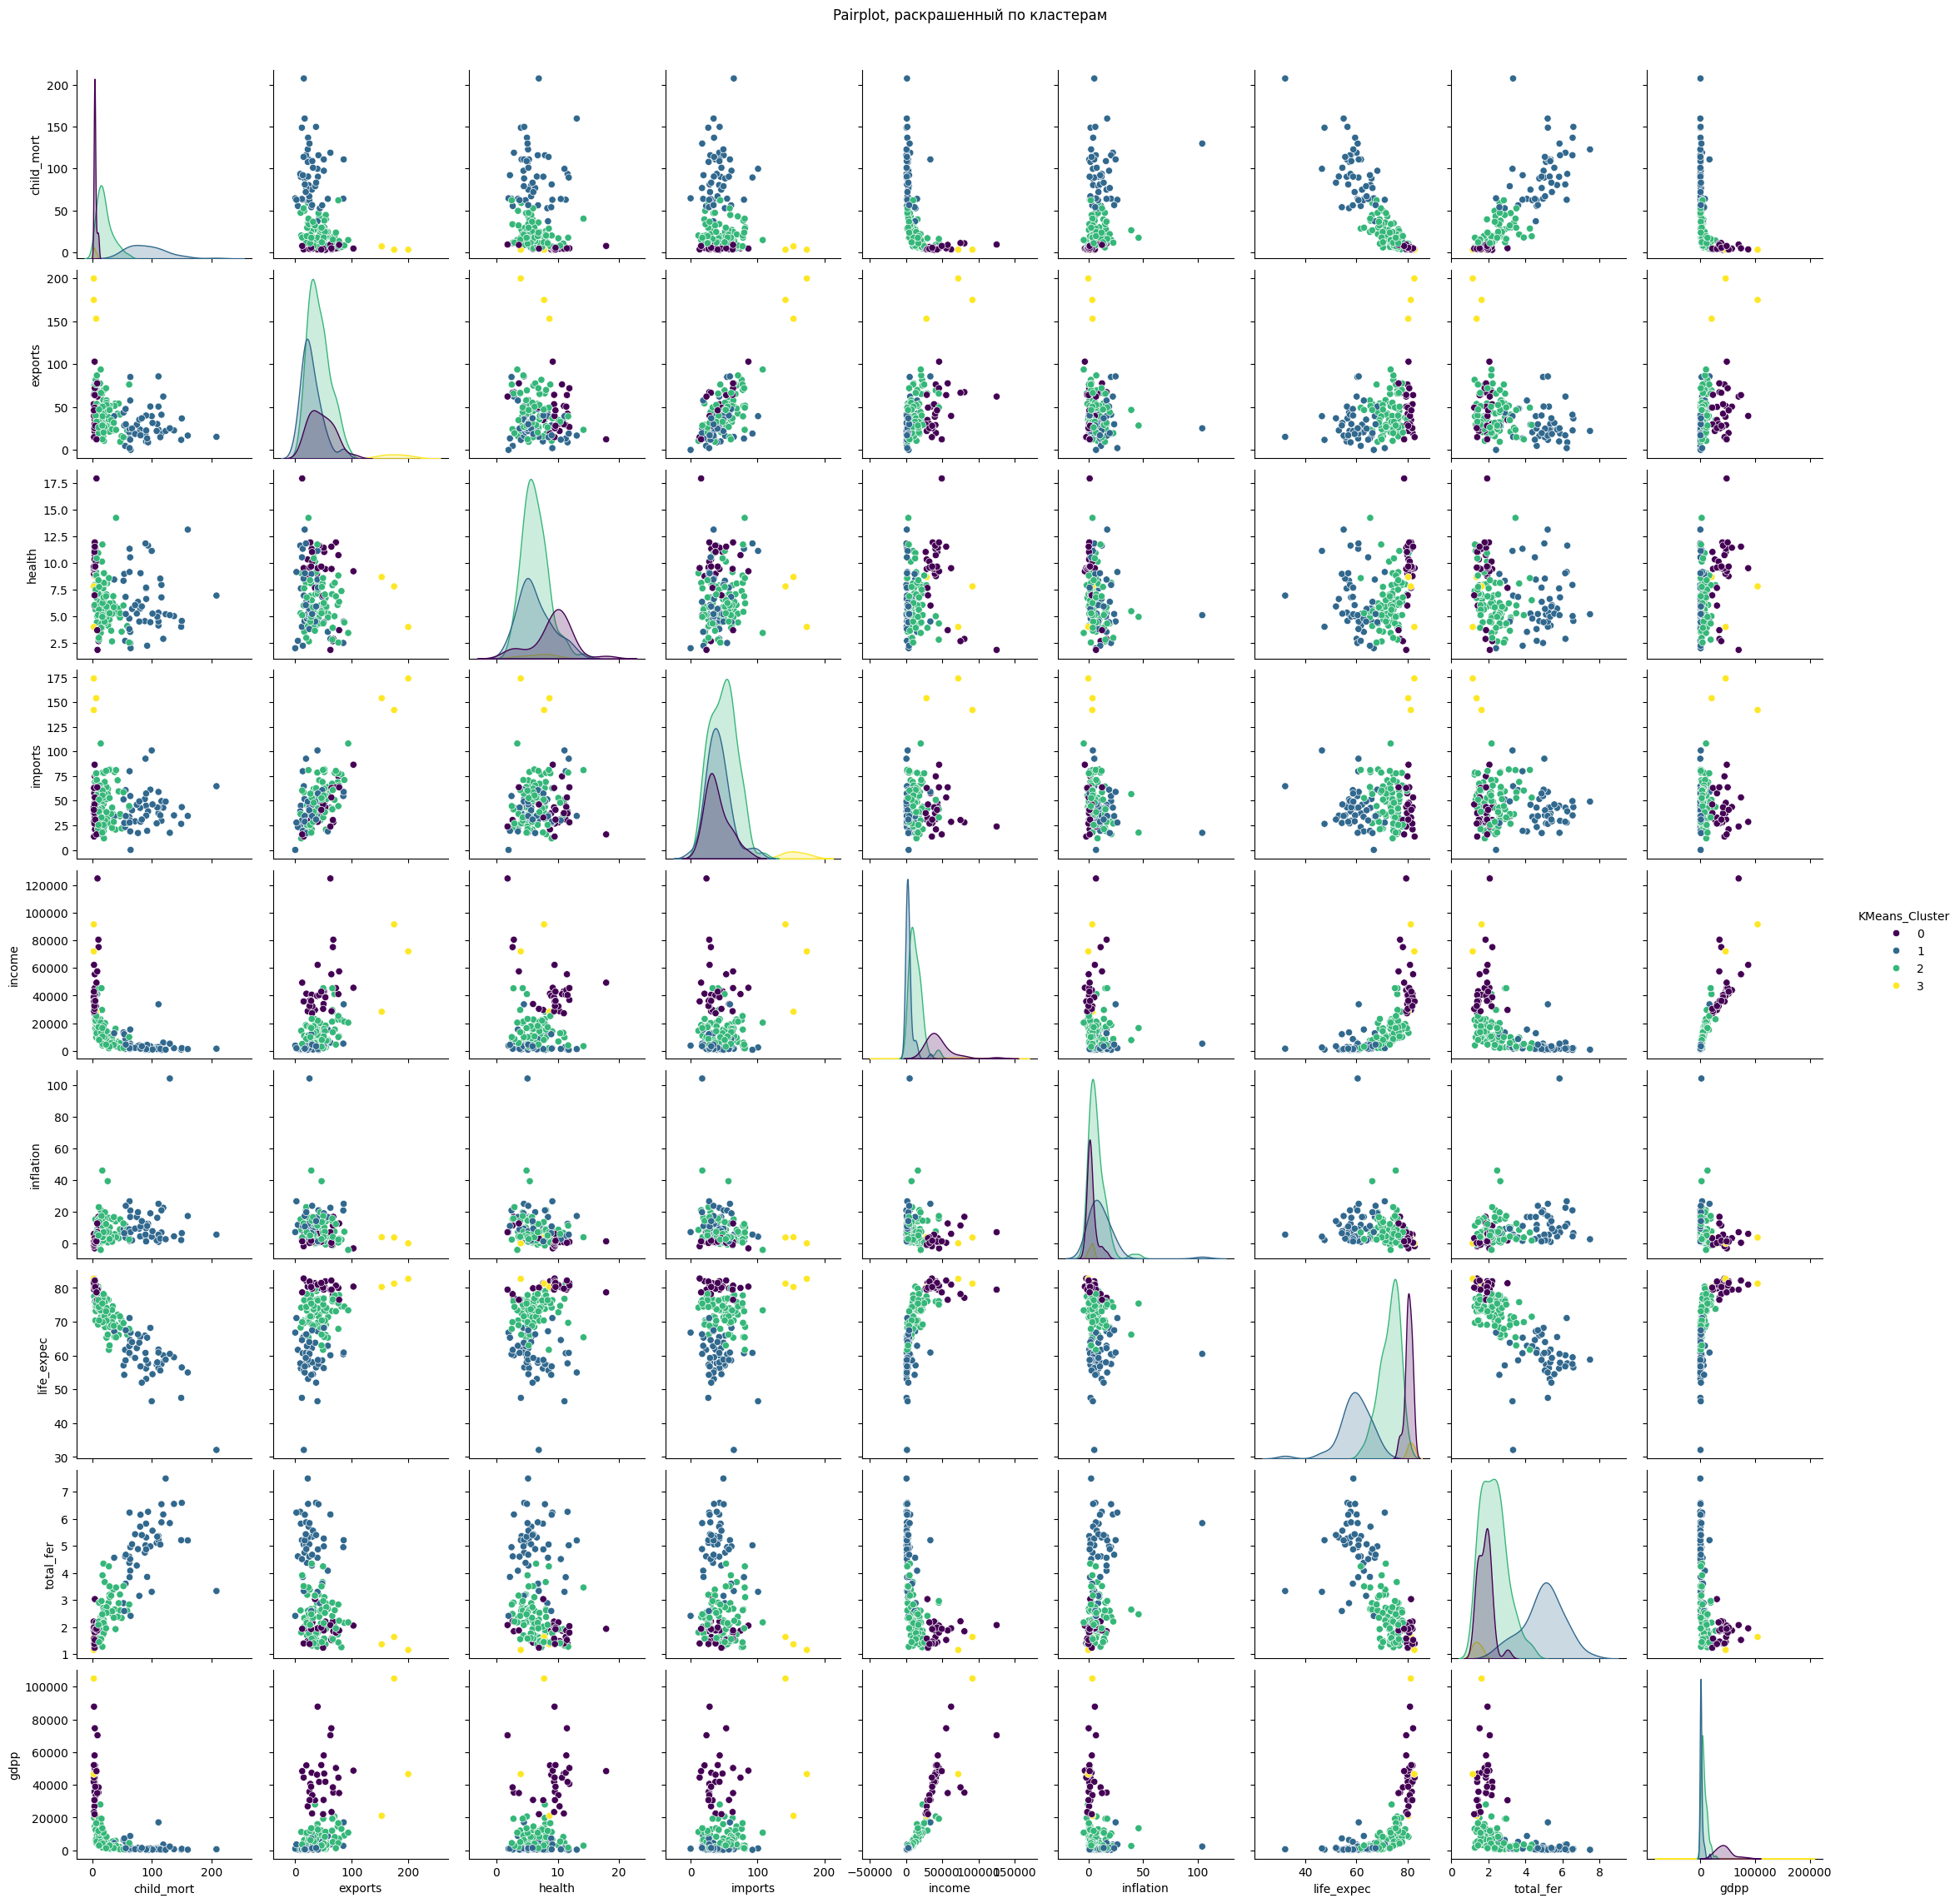

In [41]:
df = data.drop(columns=['country', 'DBSCAN_Cluster', 'Hierarchical_Cluster'], axis=1)
sns.pairplot(df, hue='KMeans_Cluster', palette='viridis') 
plt.suptitle('Pairplot, раскрашенный по кластерам', y=1.02)  
plt.show()

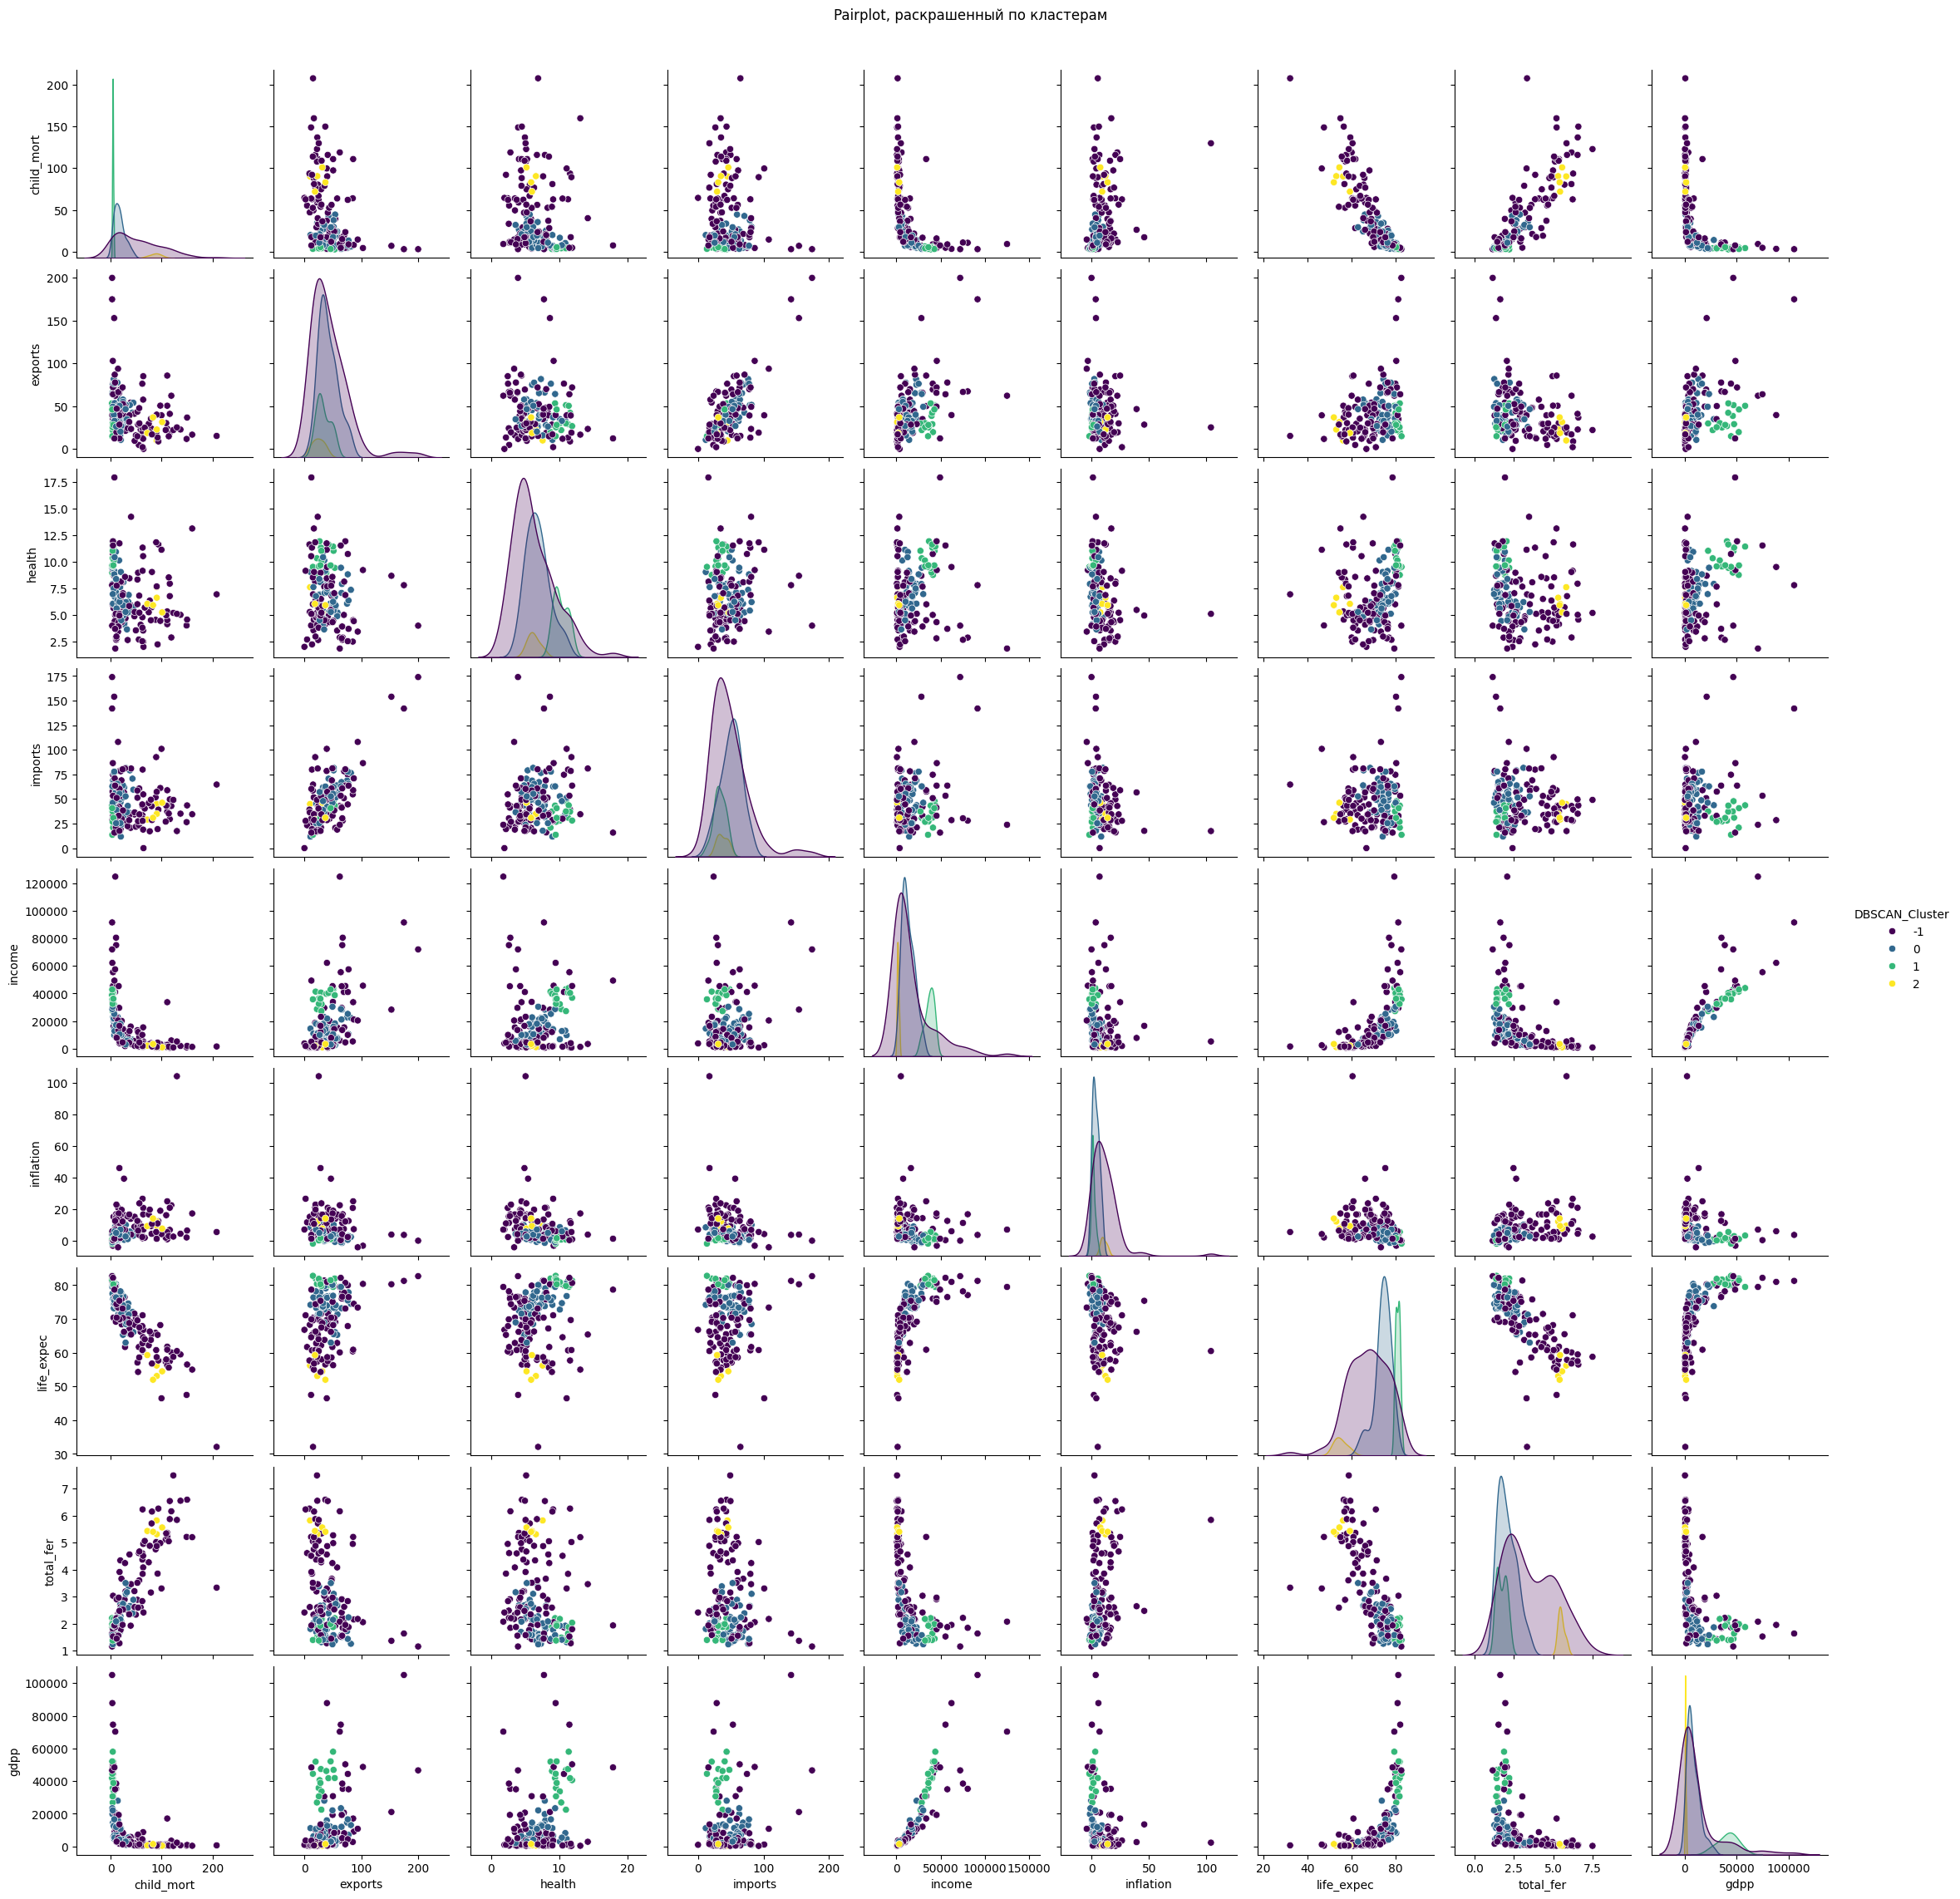

In [42]:
df = data.drop(columns=['country', 'KMeans_Cluster', 'Hierarchical_Cluster'], axis=1)
sns.pairplot(df, hue='DBSCAN_Cluster', palette='viridis') 
plt.suptitle('Pairplot, раскрашенный по кластерам', y=1.02)  
plt.show()

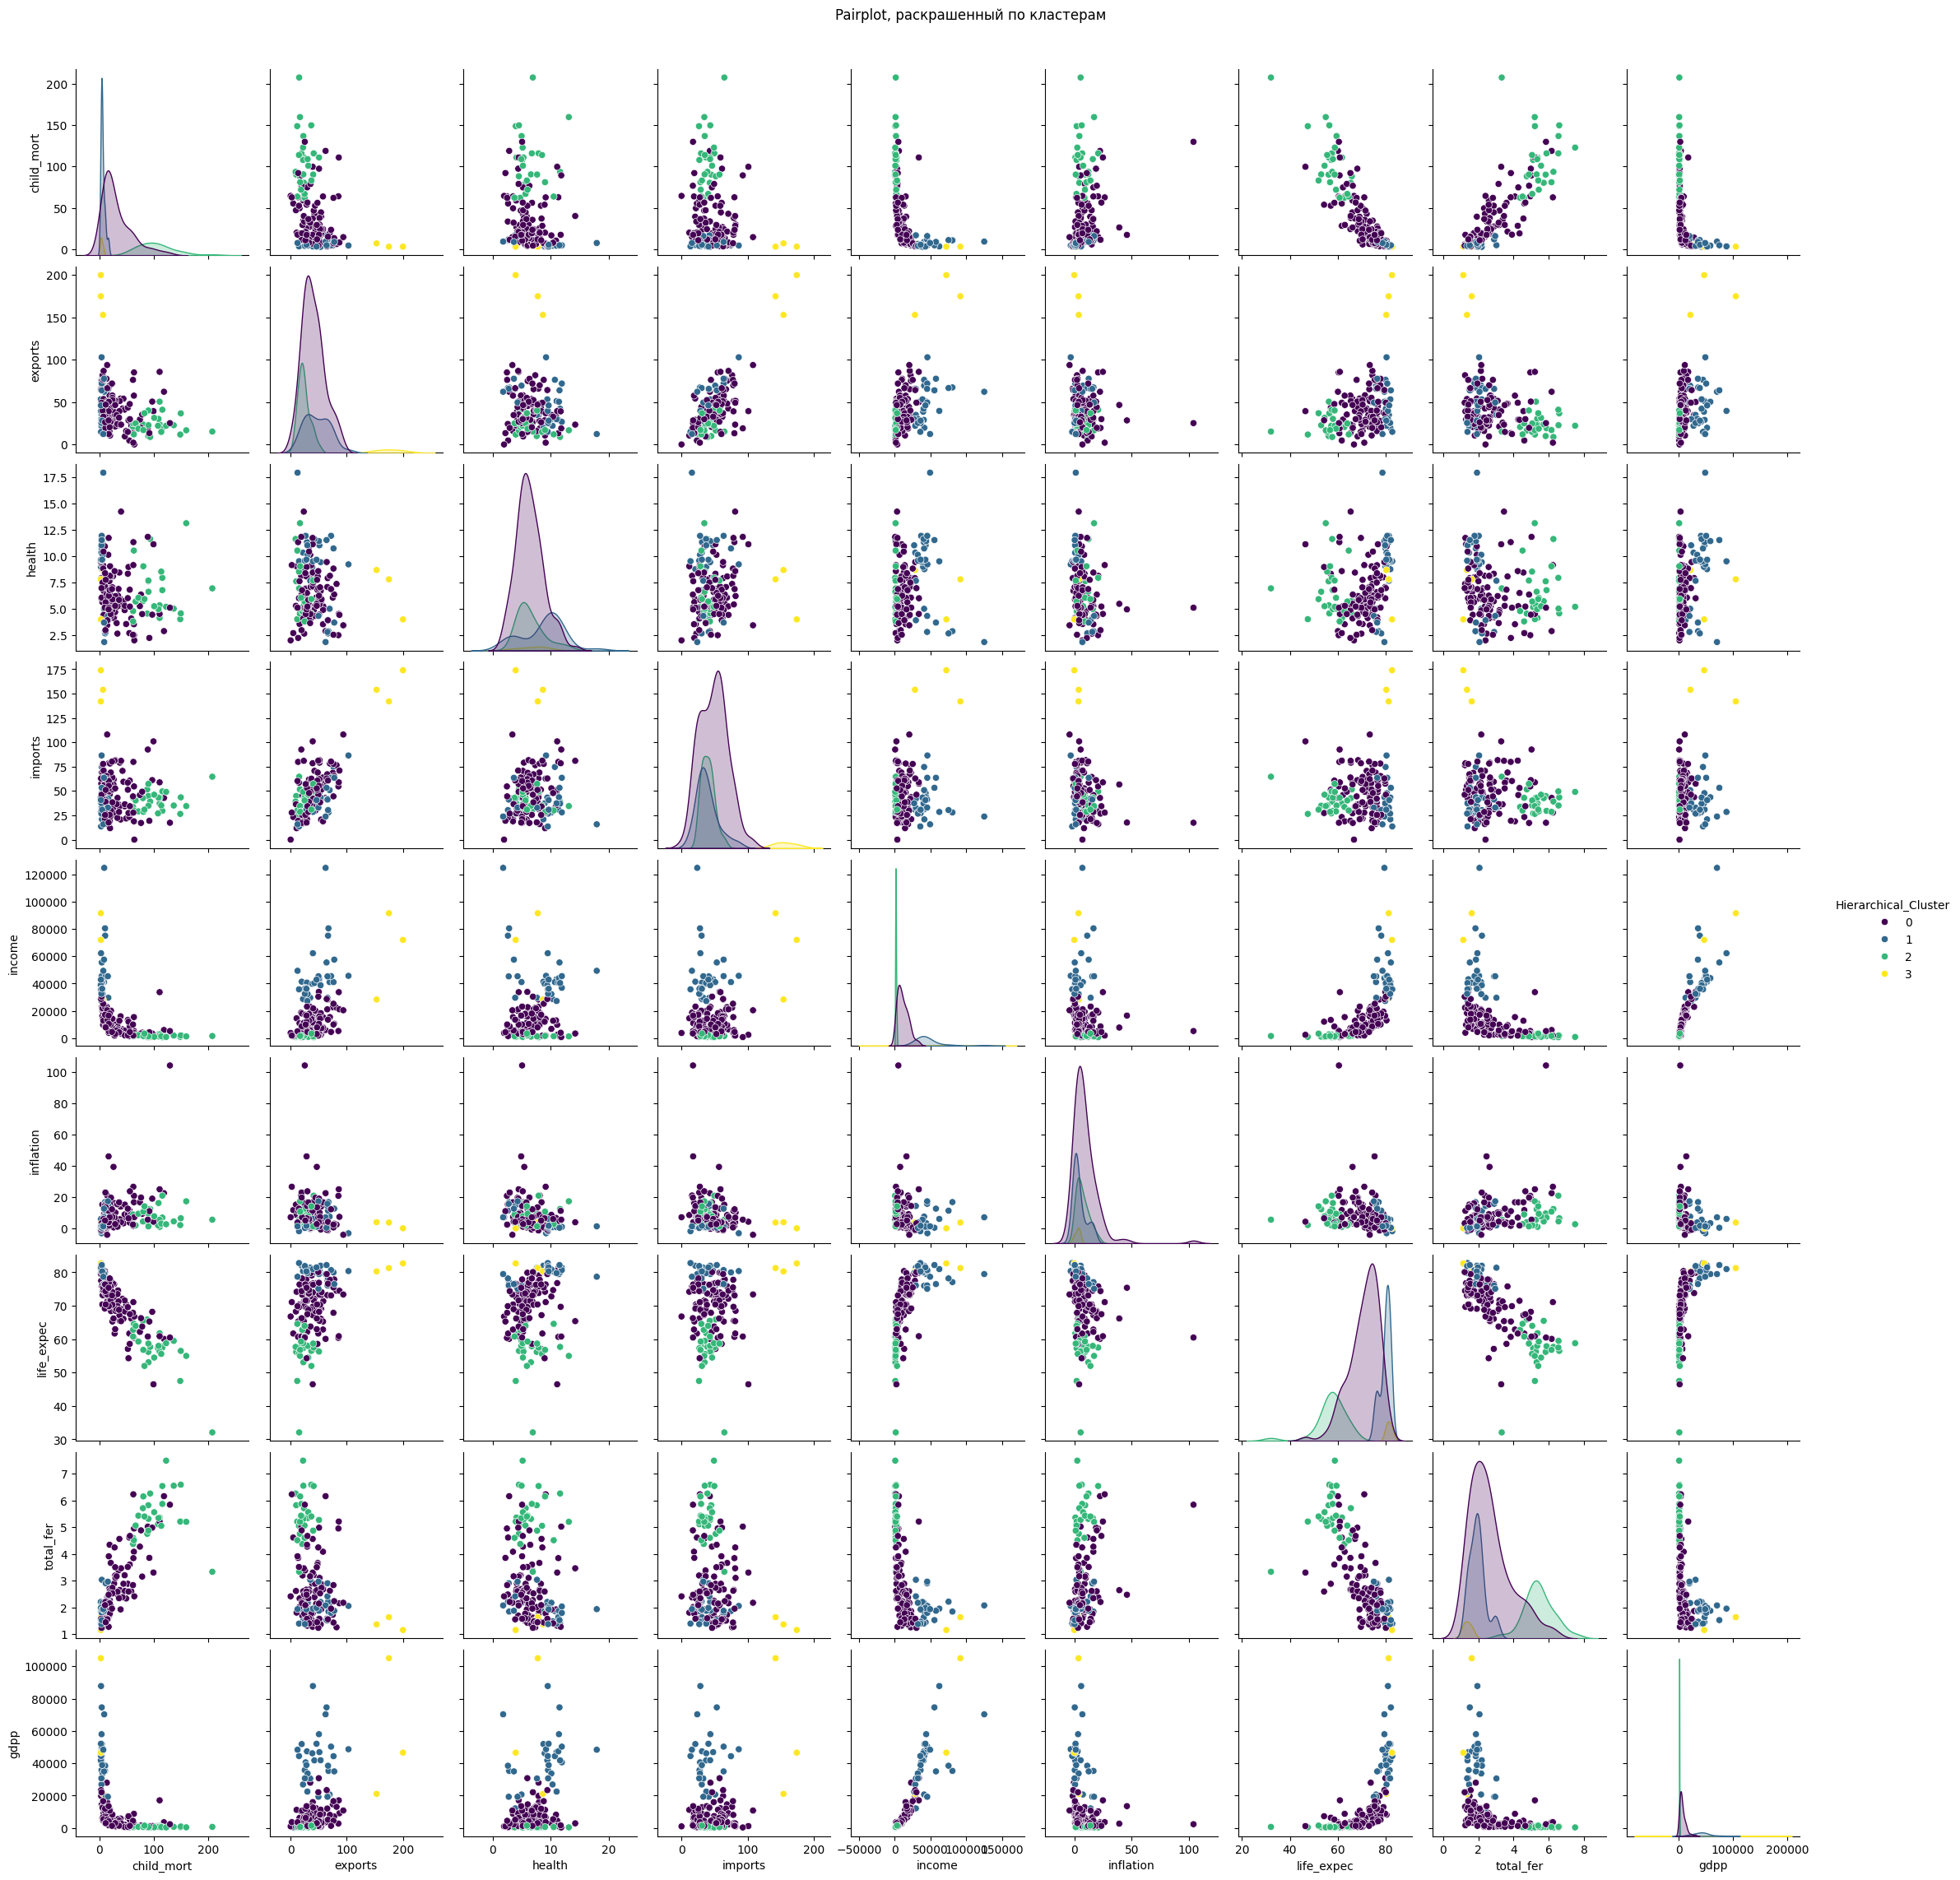

In [43]:
df = data.drop(columns=['country', 'KMeans_Cluster', 'DBSCAN_Cluster'], axis=1)
sns.pairplot(df, hue='Hierarchical_Cluster', palette='viridis') 
plt.suptitle('Pairplot, раскрашенный по кластерам', y=1.02)  
plt.show()